<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

// h = 1..12, m = 0..59
static double angle(int h, int m) {
    double hAngle = 0.5D * (h * 60 + m);
    double mAngle = 6 * m;
    double angle = Math.abs(hAngle - mAngle);
    angle = Math.min(angle, 360 - angle);
    return angle;
}
Basically:

The hour hand moves at the rate of 0.5 degrees per minute
The minute hand moves at the rate of of 6 degrees per minute


In [7]:
import datetime
now = datetime.datetime.now()
print("Minute", now.minute)
print("Hour", now.hour)

Minute 40
Hour 19


In [9]:
now.minute * 6

240

In [13]:
import time
t = time.strptime(str(now.hour), "%H")
timevalue_12hour = time.strftime( "%I", t )

In [17]:
(int(timevalue_12hour)*60+now.minute)*.5

230.0

In [19]:
import math

math.radians(360)

6.283185307179586

In [20]:
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [22]:
point = (3, 4)
origin = (0, 0)
rotate(origin, point, math.radians(10))

(2.6375113976783475, 4.143263683691346)

In [24]:
#create data

import numpy as np
import pandas as pd


data = {'hr': [1,2,3,4,5,6,7,8,9,10,11,12], 'mnth': [1,2,3,4,5,6,7,8,9,10,11,12]}

df = pd.DataFrame(data)
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))
df['mnth_sin'] = np.sin((df.mnth-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.mnth-1)*(2.*np.pi/12))

In [25]:
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)
df['hr']=hr

# mnth = []
# for x in range(0,12):
#     mnth.append(x+1)
# df['mnth']=mnth

In [26]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))


In [27]:
df

,hr,hr_sin,hr_cos
0,1,2.588190e-01,9.659258e-01
1,2,5.000000e-01,8.660254e-01
2,3,7.071068e-01,7.071068e-01
3,4,8.660254e-01,5.000000e-01
4,5,9.659258e-01,2.588190e-01
5,6,1.000000e+00,6.123234e-17
6,7,9.659258e-01,-2.588190e-01
7,8,8.660254e-01,-5.000000e-01
8,9,7.071068e-01,-7.071068e-01
9,10,5.000000e-01,-8.660254e-01


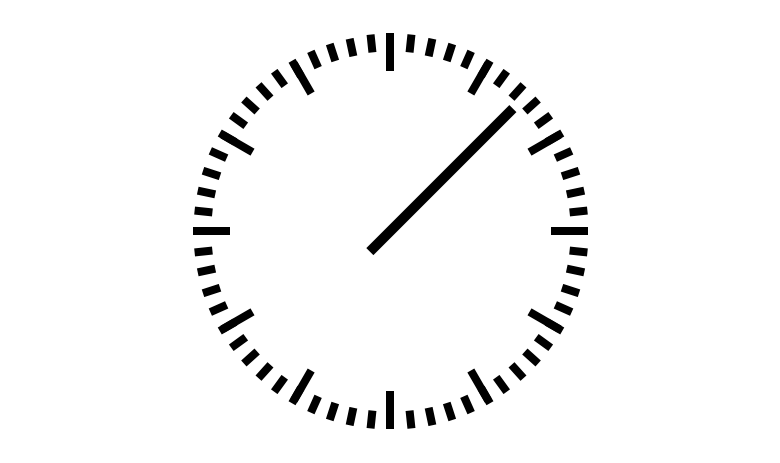

In [31]:
# https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots()

# ax.add_patch(plt.Circle((0, 0), 1.05, fill=None, ec='k', lw=5))

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.92), (a2*.92), marker=t, s=300, c='k')
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    a1, a2  = (np.sin(i*2.*np.pi/60)),np.cos(i*(2.*np.pi/60))
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.98), (a2*.98), marker=t, s=80, c='k')
    
# for i, txt in enumerate(hr):
#     plt.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.15, df['hr_cos'][i]*1.15),   # fraction, fraction
#             horizontalalignment='center',
#             verticalalignment='center')

ax.plot((df['hr_sin'][2]*.9, df['hr_sin'][2]*-.15),(df['hr_cos'][2]*.9, df['hr_cos'][2]*-.15), lw =5, c='black')
# # # ax.plot((np.sin(5)*.7,(np.sin(5)*-.2),(np.cos(5)*.7),(np.cos(5)*-.2), lw =5, c='black')
# ax.plot((np.sin(5*2.*np.pi/24)*.7,np.sin(5*2.*np.pi/24)*-.15),(np.cos(5*2.*np.pi/24)*.7,np.cos(5*2.*np.pi/24)*-.15), lw =5, c='black')
# ax.plot((np.sin(3)*.8, np.sin(3)*-.15),(np.cos(3)*.8,np.cos(3)*-.15), lw =3, marker='o',c='red', markevery=-1, markersize=8)

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show()